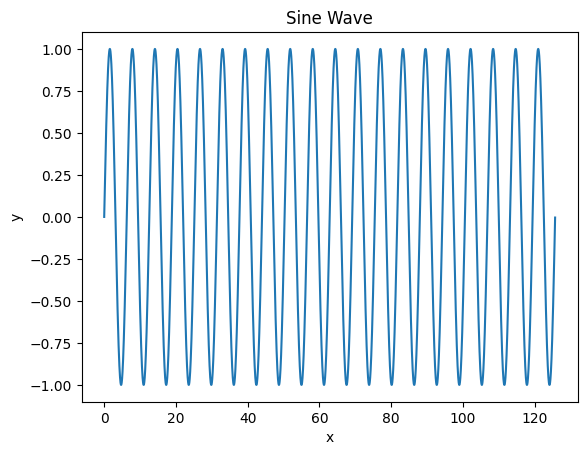

 . .

KeyboardInterrupt: 

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import EntropyHub as EH

# Create a sine wave
x = np.arange(0, 40 * np.pi, 0.01)
y = np.sin(x)

# Plot the sine wave
plt.plot(x, y)

# Add a title and labels to the axes
plt.title('Sine Wave')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

Mobj = EH.MSobject('FuzzEn', m = 5, tau = 2, Fx = 'sigmoid', r = (3, 1.2));
MSx,CI = EH.MSEn(y, Mobj, 20, Plotx=True)



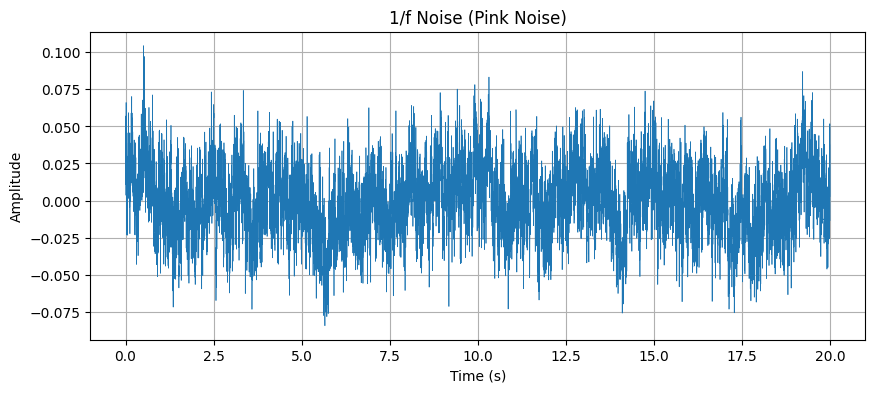

 . . . . . . . . . . . . . . . . . . . .

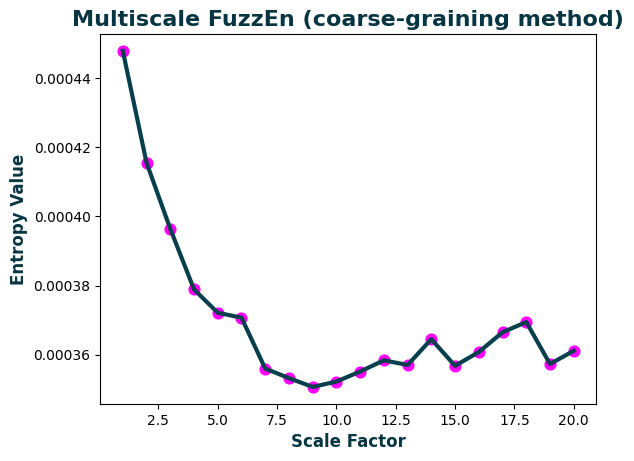

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def generate_pink_noise(length, exponent=-1.0):
    """Generate pink noise using a power-law distribution."""
    # Generate white noise with mean=0 and standard deviation=1
    white_noise = np.random.normal(0, 1, length)
    
    # Compute the frequency components of the noise
    fft_noise = np.fft.fft(white_noise)
    
    # Create a power-law distribution with a given exponent
    freqs = np.arange(length)
    power = np.power(freqs + 1, exponent)
    power[0] = 0  # Set the DC component to zero
    
    # Apply the power-law distribution to the frequency components
    fft_noise *= np.sqrt(power)
    
    # Transform the noise back to the time domain
    pink_noise = np.fft.ifft(fft_noise).real
    
    return pink_noise

# Parameters
duration = 20.0  # Duration of the noise in seconds
sampling_rate = 512  # Number of samples per second
length = int(duration * sampling_rate)

# Generate pink noise
pink_noise = generate_pink_noise(length)

# Plot the pink noise
time = np.arange(length) / sampling_rate
plt.figure(figsize=(10, 4))
plt.plot(time, pink_noise, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("1/f Noise (Pink Noise)")
plt.grid(True)
plt.show()

Mobj = EH.MSobject('FuzzEn', m = 5, tau = 2, Fx = 'sigmoid', r = (3, 1.2));
MSx,CI = EH.MSEn(pink_noise, Mobj, 20, Plotx=True)

[ 0.14458149 -0.72483961 -1.46907764 ...  0.19346653 -0.10966308
  1.97435048]


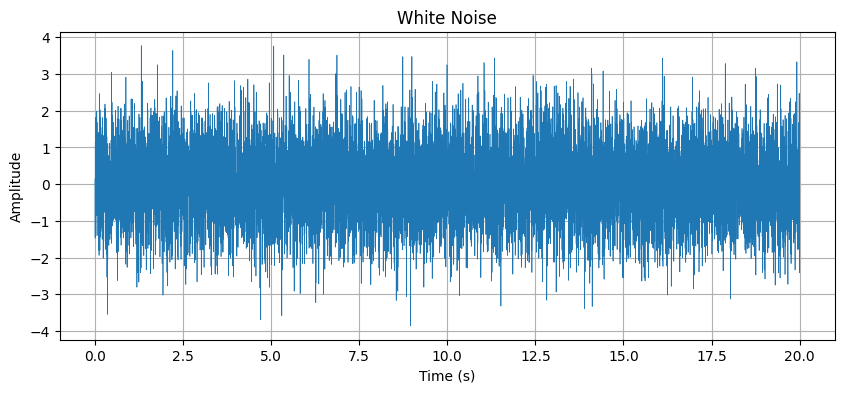

 . . . . . . . . . . . . . . . . . . . .

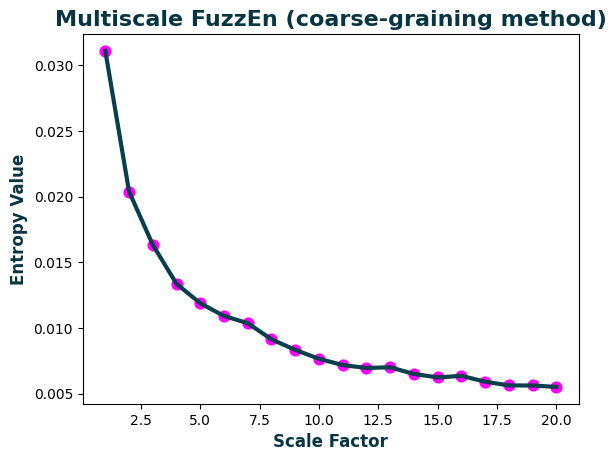

In [89]:
# Parameters
duration = 20.0  # Duration of the noise in seconds
sampling_rate = 512  # Number of samples per second
length = int(duration * sampling_rate)

white_noise = np.random.normal(0, 1, length)
print(white_noise)

# Plot the pink noise
time = np.arange(length) / sampling_rate
plt.figure(figsize=(10, 4))
plt.plot(time, white_noise, linewidth=0.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("White Noise")
plt.grid(True)
plt.show()

Mobj = EH.MSobject('FuzzEn', m = 5, tau = 2, Fx = 'sigmoid', r = (3, 1.2));
MSx,CI = EH.MSEn(white_noise, Mobj, 20, Plotx=True)

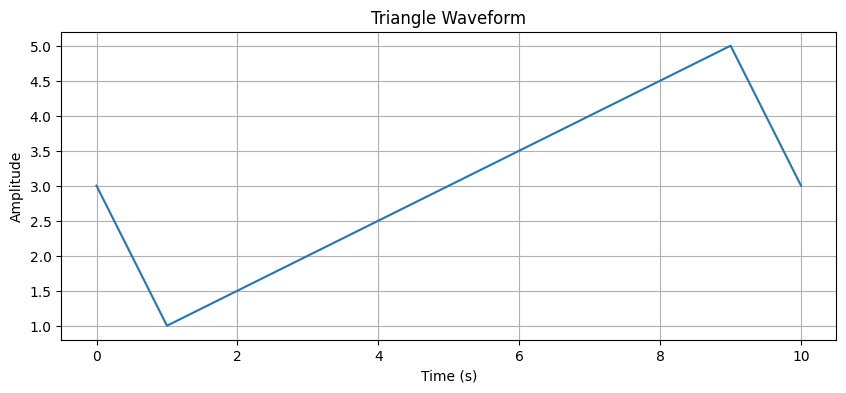

In [77]:
# Triangle Function

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

def triangle_wave(period, duration, sampling_rate):
    """Generate a triangle waveform."""
    t = np.linspace(0, duration, int(duration * sampling_rate), endpoint=False)
    triangle = signal.sawtooth(2 * np.pi * t / period, 0.5)
    return triangle

# Parameters
period = 10.0  # Period of the triangle wave in seconds (time for one full cycle)
duration = 10.0  # Duration of the waveform in seconds
sampling_rate = 20  # Number of samples per second

# Generate the triangle waveform
triangle_waveform = triangle_wave(period, duration, sampling_rate)

def f(x):
    if x % 10 == 0:
        return 3 
    else:
        return 0.5 * (1 + x)

# Plot the triangle waveform
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [f(i) for i in x]

time = np.linspace(0, duration, len(triangle_waveform))
plt.figure(figsize=(10, 4))
plt.plot(x, y, linewidth=1.5)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Triangle Waveform")
plt.grid(True)
plt.show()

tri = y




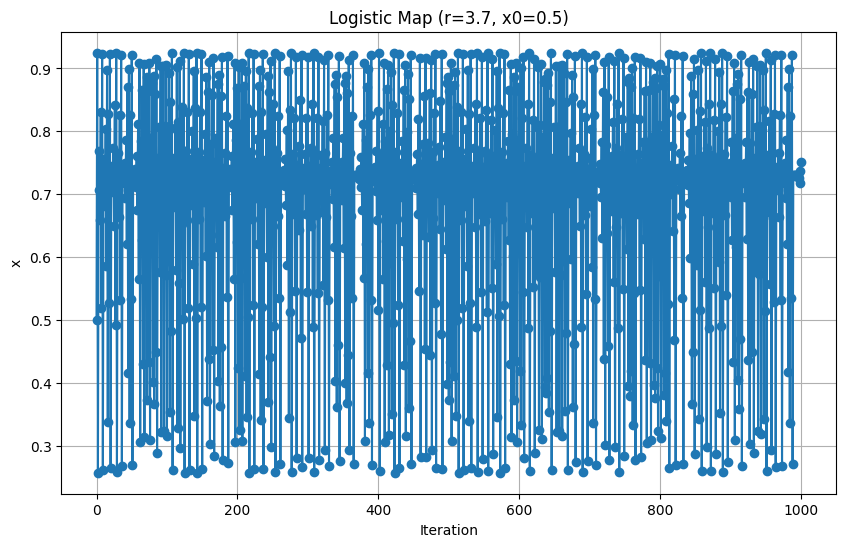

[0.5        0.925      0.2566875  ... 0.73715358 0.71690527 0.75092279]
 . . . . . . . . . . . . . . . . . . . .

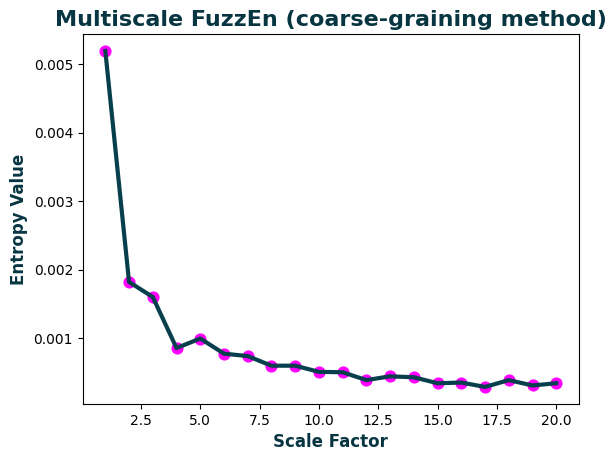

In [85]:
# Logistic Map

import numpy as np
import matplotlib.pyplot as plt

def logistic_map(r, x0, num_iterations):
    """Generate logistic map values for given parameters."""
    x_values = [x0]
    for _ in range(num_iterations):
        x_next = r * x_values[-1] * (1 - x_values[-1])
        x_values.append(x_next)
    return x_values

# Parameters
r = 3.7  # Logistic map parameter (experiment with different values)
x0 = 0.5  # Initial value of x
num_iterations = 1000  # Number of iterations

# Generate the logistic map values
y_values = logistic_map(r, x0, num_iterations)

# Plot the logistic map
iteration_numbers = np.arange(num_iterations + 1)
plt.figure(figsize=(10, 6))
plt.plot(iteration_numbers, y_values, marker='o', linestyle='-')
plt.xlabel("Iteration")
plt.ylabel("x")
plt.title(f"Logistic Map (r={r}, x0={x0})")
plt.grid(True)
plt.show()

_y = np.array(y_values)
#white_noise = np.random.normal(0, 1, length)

print(_y)
Mobj = EH.MSobject('FuzzEn', m = 5, tau = 2, Fx = 'sigmoid', r = (3, 1.2));
MSx,CI = EH.MSEn(_y, Mobj, 20, Plotx=True)

logistic_ = _y

Measuring time irreversibility in a generic context can be a complex and broad topic. To provide a more specific example, I'll demonstrate a simple function to check if a time series data is time-reversible within a certain tolerance. Time reversibility refers to the property that a process remains the same when time runs backward.

We'll use a simple test based on the behavior of the autocorrelation function (ACF). If the ACF of a time series is approximately symmetric, it suggests time-reversibility. Please note that this is just a basic approach, and time irreversibility is a deeper and more complex concept that might require more advanced techniques and considerations depending on the context.

In this example, we calculate the autocorrelation function (ACF) of the time series data up to a specified max_lag. The ACF is normalized, and we check for the symmetry difference between the ACF and its reverse. If the maximum absolute difference is within the specified tolerance, we consider the time series data to be approximately time-reversible.

Keep in mind that this is just a simple test and might not capture the full complexity of time irreversibility in more intricate systems. For more sophisticated analyses, you may need to explore specialized methods and techniques based on the specific characteristics of your data and the context in which time irreversibility is being studied.




To perform this simple test, you can use the following Python function:

In [ ]:
# More Recent approach
# https://github.com/neurotrader888/TimeSeriesReversibility

In [88]:
# Time Irreversibility Discussed in Costa M D, Peng C-K and Goldberger A L 2008 Multiscale Analysis of Heart Rate Dynamics: Entropy and Time Irreversibility Measures Cardiovasc. Eng. 8 88–93

def flipBinary(original_array):
    return  np.logical_not(original_array).astype(int)

def heaviside_array(x):
    """Heaviside (unit step) function for a NumPy array."""
    return np.heaviside(x, 1)
    
def getScaledSeries(signal, j):
    #y = [signal[idx+j] - x for idx, x in enumerate(signal) if idx <= len(signal) - 1 ]
    y = []
    for idx, x in enumerate(signal):
        if idx < len(signal) - j:
            y_i = signal[idx+j] - signal[idx] 
            y.append(y_i)
            #print(idx, y_i)
    return y


def getReversibilityScore(series):
    scaled_series = getScaledSeries(series, 1)
    increments = heaviside_array(scaled_series)
    N = len(increments)
    decrements = flipBinary(increments)
    #print(scaled_series, increments, decrements)
    #print("N", N, "increments", np.sum(increments), "Decrements", np.sum(decrements))
    return (np.sum(decrements) - np.sum(increments)) / (N - 1)


# Create a sine wave
x = np.arange(0, 40 * np.pi, 0.01)
y_sine = np.sin(x)


getReversibilityScore(white_noise)

0 -0.5172098464517717
1 0.902202967829513
2 -2.3856455507409113
3 0.8528892500590071
4 -0.5234331130353729
5 -1.286350398969301
6 0.3706870526331234
7 0.3545520572624763
8 -0.2980728027696147
9 1.945103774973056
10 -2.751018932058298
11 3.4621698872782787
12 -0.07022795626338096
13 -0.7306660764637707
14 0.8341101192798315
15 -0.3121934579352412
16 -0.6454864867753919
17 -1.1453295193002297
18 2.302766057655461
19 -2.344585939197823
20 1.2957229809215276
21 -1.5575078362123271
22 2.0613360874716293
23 -0.8776481853054375
24 0.7954352386680587
25 -2.027700137032522
26 0.6684846553837602
27 -0.3226505980875308
28 0.05371247722596051
29 1.4300988823856113
30 -1.1619649591351258
31 1.0317431848712322
32 -3.1090703473933274
33 2.2527265769440135
34 1.371942834465715
35 -0.9437963487956824
36 1.0975786503179497
37 -2.674674288232516
38 1.219250008881099
39 -1.7695577056327678
40 2.37385552638337
41 -2.4385171339763714
42 1.618985294227193
43 -0.8783306187063624
44 1.6881292107787544
45 1.394

0.009279156085172885

In [94]:
# Save Numpy Data Structure

x = np.arange(10)
np.save("./data_tutorial/data", x)

n = np.load("./data_tutorial/data.npy")

print(n)

[0 1 2 3 4 5 6 7 8 9]
